In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np

os.chdir('/Users/patrick_bloniasz/filtered_point_process')

from filtered_point_process.PointProcess import PointProcessModel
from filtered_point_process.FPP import FilteredPointProcess

In [2]:
params_config_1 = 'cox_ar1.json'
params_config_2 =  'cox_gaussian.json'

model_1 = PointProcessModel(config_file=params_config_1, seed=45)
model_2 = PointProcessModel(config_file=params_config_2, seed=45)

model_1.simulate_pp()  # Simulate the CIF model for model_1
model_2.simulate_pp()  # Simulate the CIF model for model_2

# Instantiate the FilteredPointProcess class
fpp = FilteredPointProcess(filter_1_model_1='AMPA', filter_2_model_1='1/f',
                           filter_1_model_2='GABA', filter_2_model_2='1/f',
                           model_1=model_1, model_2=model_2)

# Get the individual outputs
outputs = fpp.get_individual_outputs()

Configuration file /Users/patrick_bloniasz/filtered_point_process/filtered_point_process/config/cox_ar1.json successfully loaded.


/Users/patrick_bloniasz/filtered_point_process/filtered_point_process/PointProcess.py:8: UserWarning: Seed set globally to 45 for reproducibility.
  super()._set_seed(seed)
/Users/patrick_bloniasz/filtered_point_process/filtered_point_process/cif.py:15: UserWarning: Seed set globally to 45 for reproducibility.
  super()._set_seed(seed)
/Users/patrick_bloniasz/filtered_point_process/filtered_point_process/pp.py:21: UserWarning: Seed set globally to 45 for reproducibility.
  super()._set_seed(seed)


Configuration file /Users/patrick_bloniasz/filtered_point_process/filtered_point_process/config/cox_gaussian.json successfully loaded.


Example 1: Using AMPA and 1/f Filters for model_1, and GABA and 1/f Filters for model_2

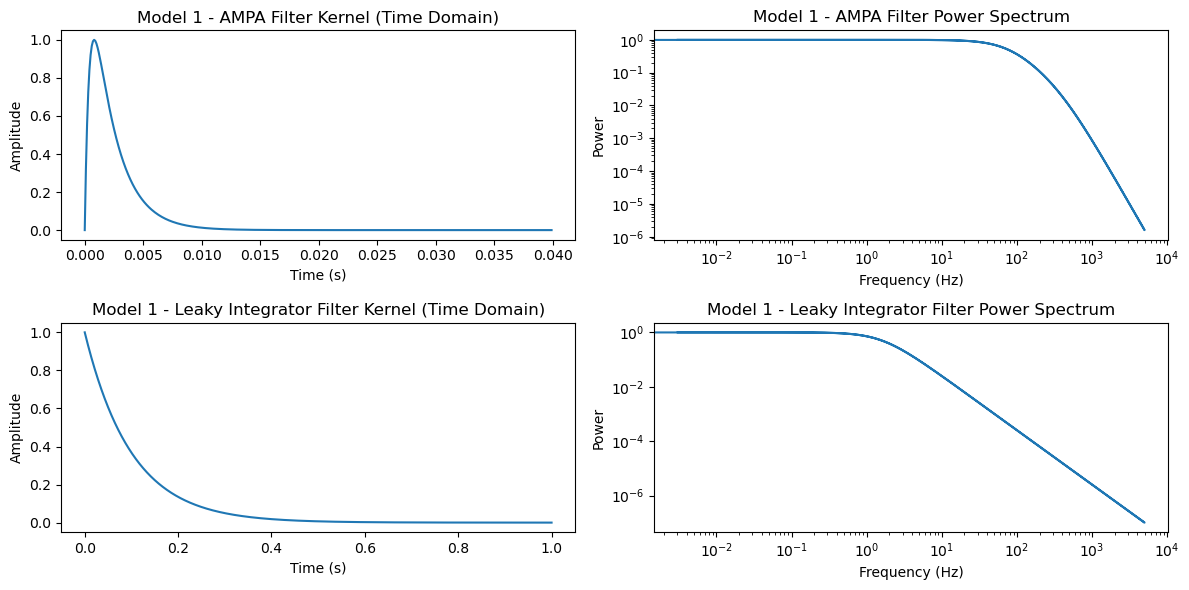

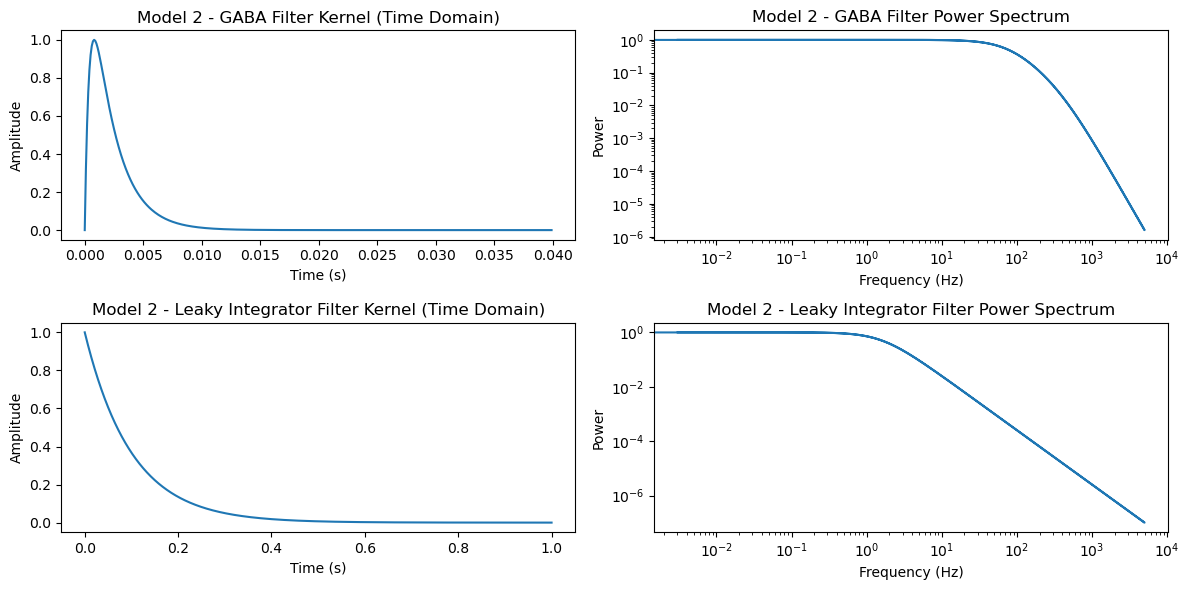

In [3]:
# Plotting the filters for model_1
if 'model_1_filter_1' in outputs:
    ampa_outputs = outputs['model_1_filter_1']
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 2, 1)
    plt.plot(ampa_outputs["time_axis"], ampa_outputs["kernel"])
    plt.title("Model 1 - AMPA Filter Kernel (Time Domain)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    plt.subplot(2, 2, 2)
    plt.loglog(ampa_outputs["frequencies"], ampa_outputs["power_spectrum"])
    plt.title("Model 1 - AMPA Filter Power Spectrum")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power")

if 'model_1_filter_2' in outputs:
    leaky_outputs = outputs['model_1_filter_2']

    plt.subplot(2, 2, 3)
    plt.plot(leaky_outputs["time_axis"], leaky_outputs["kernel"])
    plt.title("Model 1 - Leaky Integrator Filter Kernel (Time Domain)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    plt.subplot(2, 2, 4)
    plt.loglog(leaky_outputs["frequencies"], leaky_outputs["power_spectrum"])
    plt.title("Model 1 - Leaky Integrator Filter Power Spectrum")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power")

    plt.tight_layout()
    plt.show()

# Plotting the filters for model_2
if 'model_2_filter_1' in outputs:
    gaba_outputs = outputs['model_2_filter_1']
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 2, 1)
    plt.plot(gaba_outputs["time_axis"], gaba_outputs["kernel"])
    plt.title("Model 2 - GABA Filter Kernel (Time Domain)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    plt.subplot(2, 2, 2)
    plt.loglog(gaba_outputs["frequencies"], gaba_outputs["power_spectrum"])
    plt.title("Model 2 - GABA Filter Power Spectrum")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power")

if 'model_2_filter_2' in outputs:
    leaky_outputs_model_2 = outputs['model_2_filter_2']

    plt.subplot(2, 2, 3)
    plt.plot(leaky_outputs_model_2["time_axis"], leaky_outputs_model_2["kernel"])
    plt.title("Model 2 - Leaky Integrator Filter Kernel (Time Domain)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    plt.subplot(2, 2, 4)
    plt.loglog(leaky_outputs_model_2["frequencies"], leaky_outputs_model_2["power_spectrum"])
    plt.title("Model 2 - Leaky Integrator Filter Power Spectrum")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power")

    plt.tight_layout()
    plt.show()


Example 2: Using FastAP and 1/f Filters for model_1, and SlowAP and 1/f Filters for model_2

Configuration file /Users/patrick_bloniasz/filtered_point_process/filtered_point_process/config/cox_ar1.json successfully loaded.
Configuration file /Users/patrick_bloniasz/filtered_point_process/filtered_point_process/config/cox_gaussian.json successfully loaded.


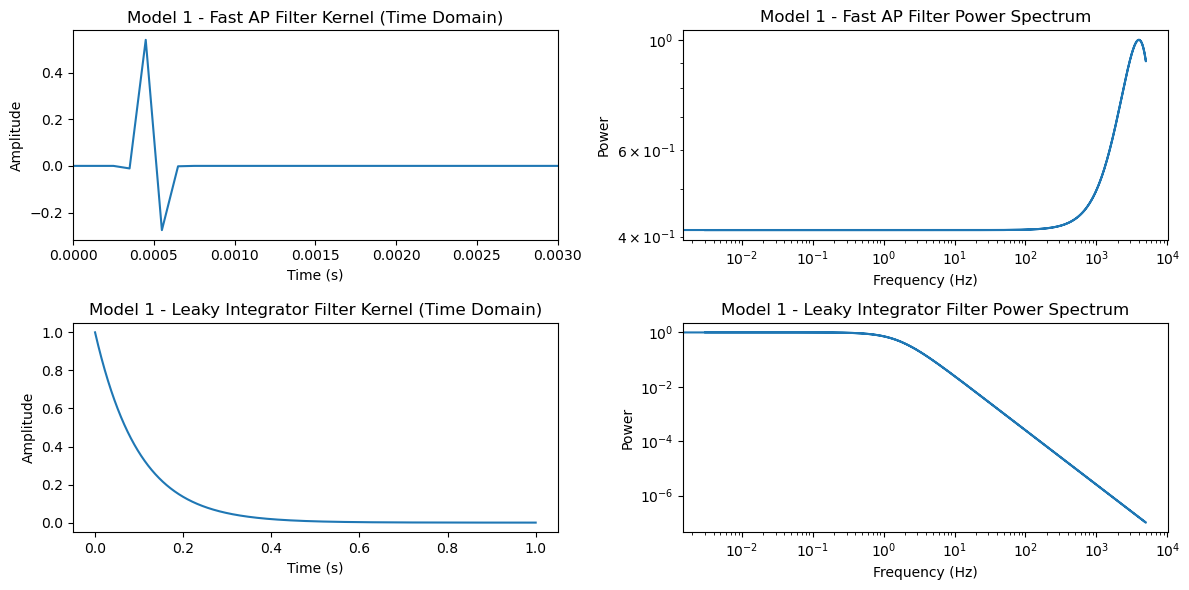

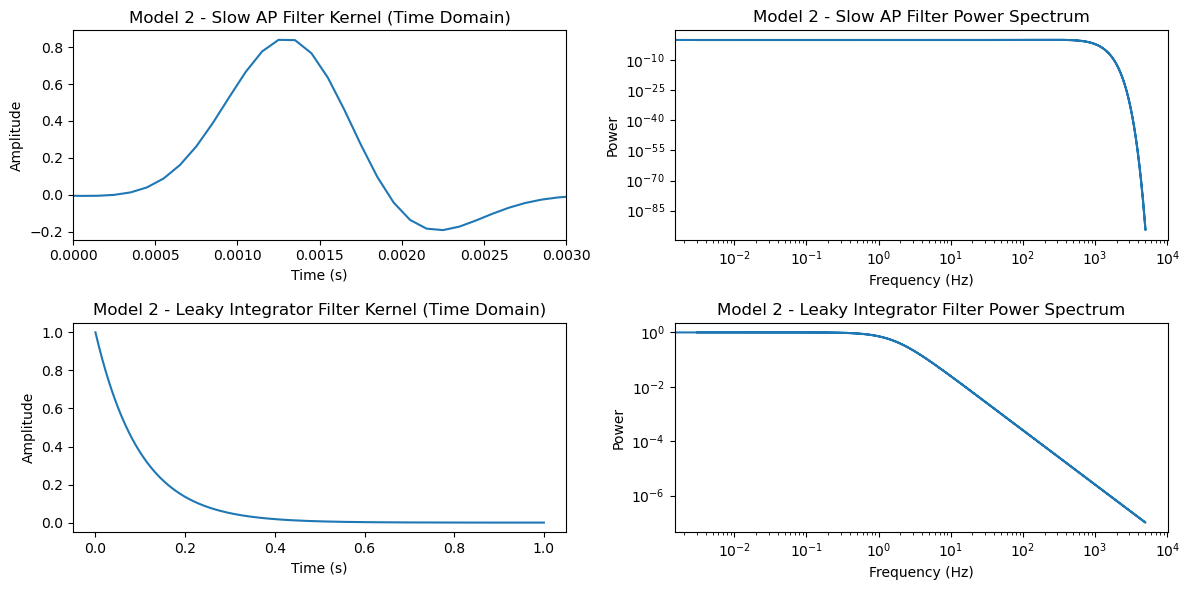

In [4]:
params_config_1 = 'cox_ar1.json'
params_config_2 = 'cox_gaussian.json'

model_1 = PointProcessModel(config_file=params_config_1, seed=45)
model_2 = PointProcessModel(config_file=params_config_2, seed=45)

model_1.simulate_pp()  # Simulate the CIF model for model_1
model_2.simulate_pp()  # Simulate the CIF model for model_2

# Instantiate the FilteredPointProcess class
fpp = FilteredPointProcess(filter_1_model_1='Fast_AP', filter_2_model_1='1/f',
                           filter_1_model_2='Slow_AP', filter_2_model_2='1/f',
                           model_1=model_1, model_2=model_2)

# Get the individual outputs
outputs = fpp.get_individual_outputs()

# Plotting the filters for model_1
if 'model_1_filter_1' in outputs:
    fast_ap_outputs = outputs['model_1_filter_1']
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 2, 1)
    plt.plot(fast_ap_outputs["time_axis"], fast_ap_outputs["kernel"])
    plt.title("Model 1 - Fast AP Filter Kernel (Time Domain)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.xlim(0, 0.003)

    plt.subplot(2, 2, 2)
    plt.loglog(fast_ap_outputs["frequencies"], fast_ap_outputs["power_spectrum"])
    plt.title("Model 1 - Fast AP Filter Power Spectrum")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power")

if 'model_1_filter_2' in outputs:
    leaky_outputs = outputs['model_1_filter_2']

    plt.subplot(2, 2, 3)
    plt.plot(leaky_outputs["time_axis"], leaky_outputs["kernel"])
    plt.title("Model 1 - Leaky Integrator Filter Kernel (Time Domain)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    plt.subplot(2, 2, 4)
    plt.loglog(leaky_outputs["frequencies"], leaky_outputs["power_spectrum"])
    plt.title("Model 1 - Leaky Integrator Filter Power Spectrum")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power")

    plt.tight_layout()
    plt.show()

# Plotting the filters for model_2
if 'model_2_filter_1' in outputs:
    slow_ap_outputs = outputs['model_2_filter_1']
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 2, 1)
    plt.plot(slow_ap_outputs["time_axis"], slow_ap_outputs["kernel"])
    plt.title("Model 2 - Slow AP Filter Kernel (Time Domain)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.xlim(0, 0.003)

    plt.subplot(2, 2, 2)
    plt.loglog(slow_ap_outputs["frequencies"], slow_ap_outputs["power_spectrum"])
    plt.title("Model 2 - Slow AP Filter Power Spectrum")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power")

if 'model_2_filter_2' in outputs:
    leaky_outputs_model_2 = outputs['model_2_filter_2']

    plt.subplot(2, 2, 3)
    plt.plot(leaky_outputs_model_2["time_axis"], leaky_outputs_model_2["kernel"])
    plt.title("Model 2 - Leaky Integrator Filter Kernel (Time Domain)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    plt.subplot(2, 2, 4)
    plt.loglog(leaky_outputs_model_2["frequencies"], leaky_outputs_model_2["power_spectrum"])
    plt.title("Model 2 - Leaky Integrator Filter Power Spectrum")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power")

    plt.tight_layout()
    plt.show()
